In [2]:
import os
import numpy as np
import mne
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [68]:
data=r'F:\mohamed\4th_year_new\GRAD project\mine data\d 2017\S01_MI\motorimagination_subject1_run1.gdf'

raw=mne.io.read_raw_gdf(data,preload=True)

In [80]:
raw.load_data()#raw.crop(0,60).load_data()

<RawGDF | motorimagination_subject1_run1.gdf, 96 x 165888 (324.0 s), ~121.6 MB, data loaded>

In [81]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, FFC4h, FFC6h, ...
 chs: 96 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2015-05-28 12:50:41 UTC
 nchan: 96
 projs: []
 sfreq: 512.0 Hz
>

- types of artifacts
     - environmental artifacts
     - Instrumentation artifacts
     - Biological artifacts

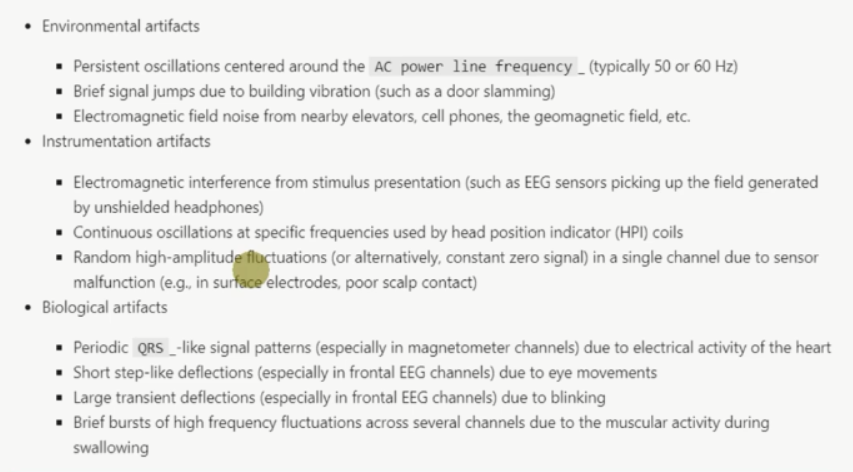

**options to handle artifacts**
1. ignore the artifact and carry on with analysis
2. Exclude the corrupted portion of the data and analyze the remaining data
3. Repair the artifact by suppressing artifactual part of the recording while(hopefully)leaving the signal of interest intact

we need to Pre-process the data to deal with the artifacts

1st 
pick up from the scalp

- ICA
- Maxwell filtering
- signal space separation and projection techniques


In [82]:
#ecg=mne.preprocessing.create_ecg_epochs(raw) #to find any ecg signal
#ecg.plot_image(combine='mean')

In [89]:
raw=mne.io.read_raw_gdf(data,preload=True)

Extracting EDF parameters from F:\mohamed\4th_year_new\GRAD project\mine data\d 2017\S01_MI\motorimagination_subject1_run1.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, FFC4h, FFC6h, FC5, FC3, FC1, FCz, FC2, FC4, FC6, FTT7h, FCC5h, FCC3h, FCC1h, FCC2h, FCC4h, FCC6h, FTT8h, C5, C3, C1, Cz, C2, C4, C6, TTP7h, CCP5h, CCP3h, CCP1h, CCP2h, CCP4h, CCP6h, TTP8h, CP5, CP3, CP1, CPz, CP2, CP4, CP6, CPP5h, CPP3h, CPP1h, CPP2h, CPP4h, CPP6h, P3, P1, Pz, P2, P4, PPO1h, PPO2h, eog-l, eog-m, eog-r, thumb_near, thumb_far, thumb_index, index_near, index_far, index_middle, middle_near, middle_far, middle_ring, ring_near, ring_far, ring_little, litte_near, litte_far, thumb_palm, wrist_bend, roll, pitch, gesture, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeod

# filtering and resampling

In [88]:
#tmin,tmax=0,20
#raw.crop(tmin,tmax).load_data()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.500 (s)


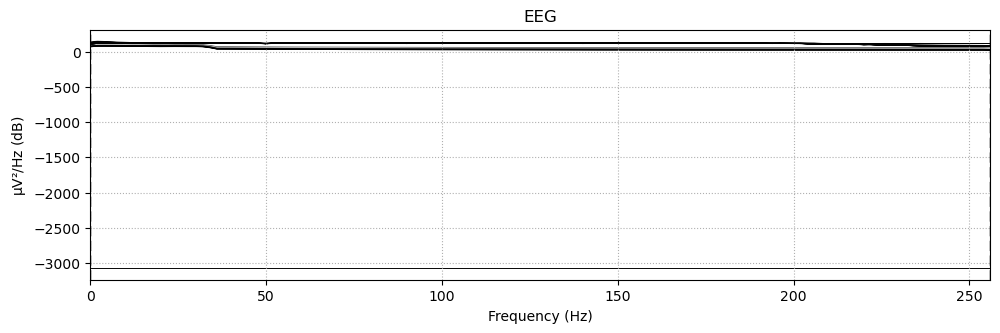

In [84]:
raw.plot_psd(area_mode='range',average=False)

# Reading

In [214]:
raw=mne.io.read_raw_gdf(data,preload=True)

Extracting EDF parameters from F:\mohamed\4th_year_new\GRAD project\mine data\d 2017\S01_MI\motorimagination_subject1_run1.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, FFC4h, FFC6h, FC5, FC3, FC1, FCz, FC2, FC4, FC6, FTT7h, FCC5h, FCC3h, FCC1h, FCC2h, FCC4h, FCC6h, FTT8h, C5, C3, C1, Cz, C2, C4, C6, TTP7h, CCP5h, CCP3h, CCP1h, CCP2h, CCP4h, CCP6h, TTP8h, CP5, CP3, CP1, CPz, CP2, CP4, CP6, CPP5h, CPP3h, CPP1h, CPP2h, CPP4h, CPP6h, P3, P1, Pz, P2, P4, PPO1h, PPO2h, eog-l, eog-m, eog-r, thumb_near, thumb_far, thumb_index, index_near, index_far, index_middle, middle_near, middle_far, middle_ring, ring_near, ring_far, ring_little, litte_near, litte_far, thumb_palm, wrist_bend, roll, pitch, gesture, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeod

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.500 (s)


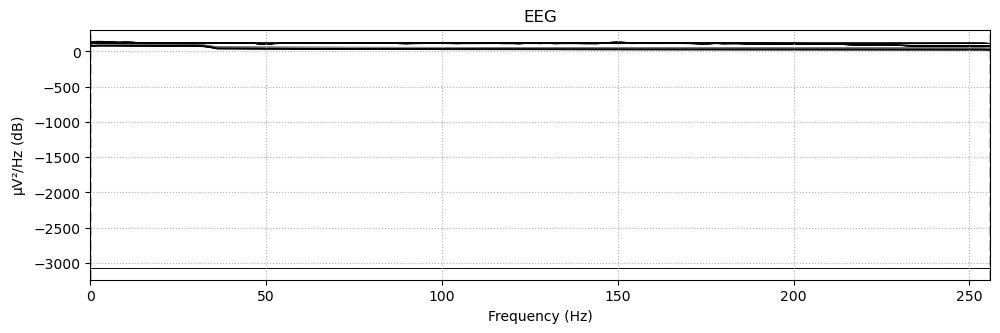

In [215]:
raw.plot_psd()

# Marking bad channels

In [216]:
ch=raw.info['ch_names'].copy()
bad=ch[33:]
raw.info['bads']=bad

In [251]:
picks=mne.pick_types(raw.info,eeg=True)
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.500 (s)


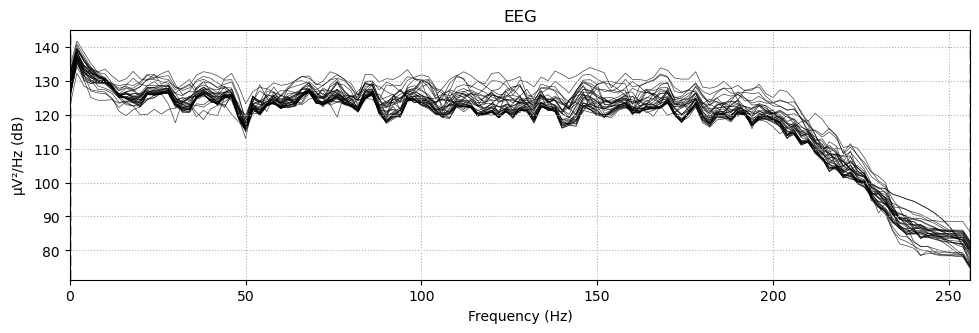

In [252]:
raw.plot_psd(area_mode='range',tmax=10.0,picks=picks,average=False)

In [221]:
#raw.plot_psd(area_mode='range',exclude=picks,average=False)

# band pass filter

## Removing power-line noise with low-pass filtering

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 137 samples (0.268 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.500 (s)


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    1.7s finished


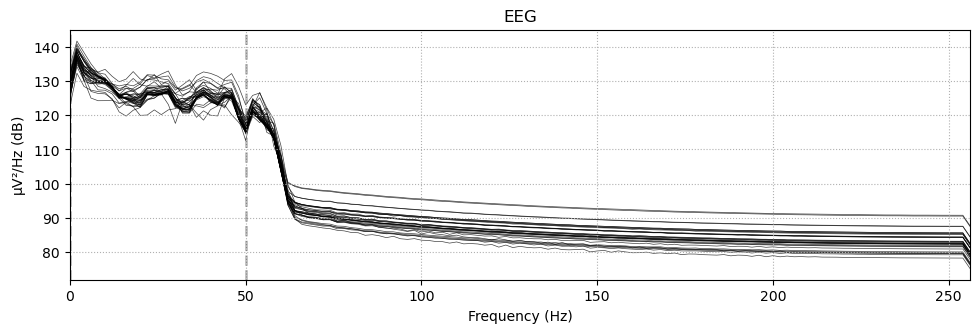

In [222]:
raw.filter(None,50.,fir_design='firwin',)
raw.plot_psd(area_mode='range',tmax=10.0,exclude=picks,average=False)

# High pass filtering to ramove slow drifts

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.500 (s)


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.7s finished


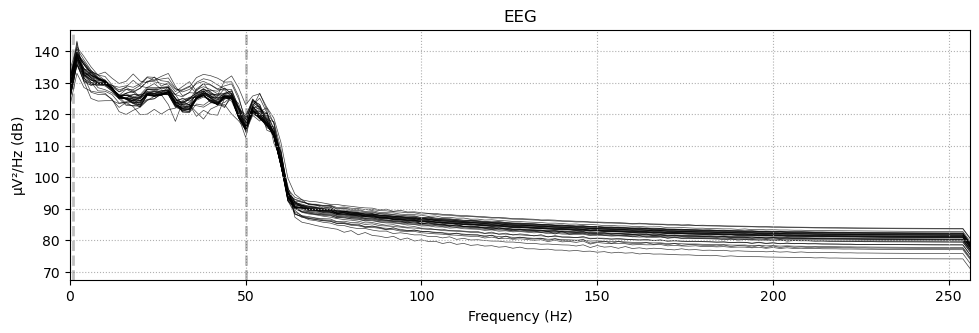

In [223]:
raw.filter(1.,None,fir_design='firwin')
raw.plot_psd(area_mode='range',tmax=10.0,exclude='bads',average=False)

## down sampling 

- signal with high sampling rate is desired 
but if much higher it wil be bad as it will cinsumes memory and slows computations
so we wil downsample the data 

- down sampling  will reduce the timing precision of events
- To avoid this reduction the folloing pipeline for processing final data 
1. low pass filter the data with `mne.io.raw.filter`
2. extract epochs `mne.epochs`
3. decimate the epochs object using `mne.epochs.decimate` or `decim` argument to the `mne.Epochs` object

In [254]:
# raw.resample(100,npad='auto') #set samppling freqency to 100hz
# raw.plot_psd(area_mode='range',tmax=10.0,picks=picks,)

# Another way of marking bad channels

In [277]:
raw=mne.io.read_raw_gdf(data,preload=True)

Extracting EDF parameters from F:\mohamed\4th_year_new\GRAD project\mine data\d 2017\S01_MI\motorimagination_subject1_run1.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, FFC4h, FFC6h, FC5, FC3, FC1, FCz, FC2, FC4, FC6, FTT7h, FCC5h, FCC3h, FCC1h, FCC2h, FCC4h, FCC6h, FTT8h, C5, C3, C1, Cz, C2, C4, C6, TTP7h, CCP5h, CCP3h, CCP1h, CCP2h, CCP4h, CCP6h, TTP8h, CP5, CP3, CP1, CPz, CP2, CP4, CP6, CPP5h, CPP3h, CPP1h, CPP2h, CPP4h, CPP6h, P3, P1, Pz, P2, P4, PPO1h, PPO2h, eog-l, eog-m, eog-r, thumb_near, thumb_far, thumb_index, index_near, index_far, index_middle, middle_near, middle_far, middle_ring, ring_near, ring_far, ring_little, litte_near, litte_far, thumb_palm, wrist_bend, roll, pitch, gesture, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeodummy, armeod

In [278]:
# ch=raw.info['ch_names'].copy()
# ch.remove('eog-l')
# raw.reorder_channels(['eog-l']+ch)
# raw.plot();

In [279]:
ch=raw.info['ch_names'].copy()
bad=ch[33:]
raw.info['bads']=bad

# marking and dropping bad epochs 

In [280]:
events,event_dict=mne.events_from_annotations(raw)

Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


In [281]:
tmin,tmax=-0.2,0.5
baseline=(None,0)
picks=mne.pick_types(raw.info,eeg=True,exclude='bads')

In [282]:
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [300]:
epochs=mne.Epochs(raw,events,event_dict,tmin,tmax,proj=True,
                 picks=picks,baseline=baseline,preload=True,
                 event_repeated='drop')

Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
126 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 126 events and 359 original time points ...
0 bad epochs dropped


In [301]:
epochs
#768:'trial start', event that strat first every time code 17
#33536 trial end beep code= 8

Number of events,126
Events,1536: 61537: 61538: 61539: 61540: 61541: 61542: 633536: 42768: 42
Time range,-0.199 – 0.500 sec
Baseline,-0.199 – 0.000 sec


In [302]:
42+42+42

126

In [ ]:
# rej=dict(eog=200e-6)
# epochs.drop_bad(reject=rej)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


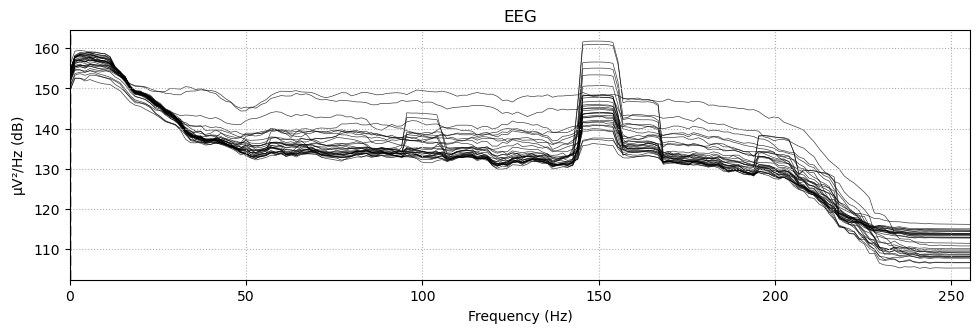

In [289]:
epochs['1536'].plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


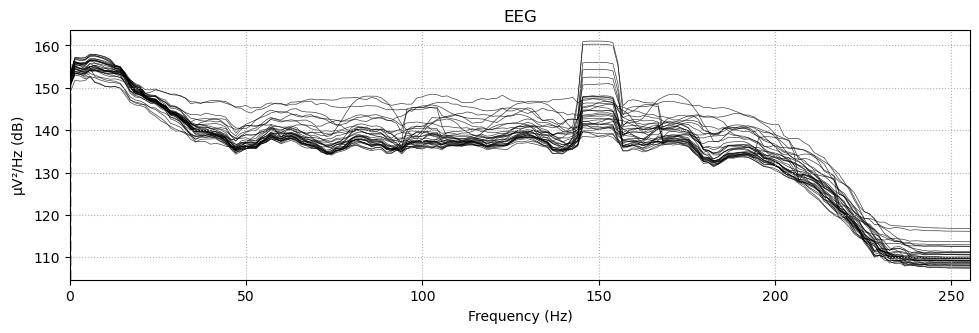

In [291]:
epochs['1539'].plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


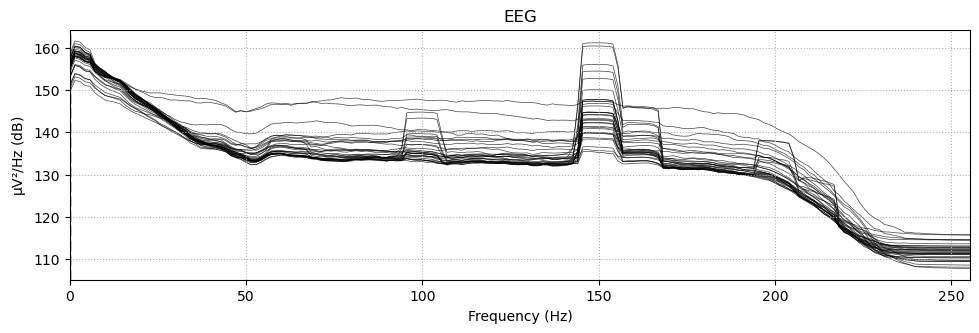

In [294]:
epochs['33536'].plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


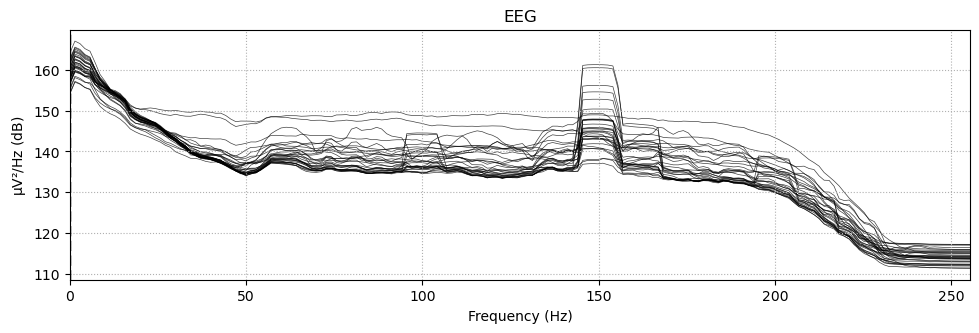

In [295]:
epochs['768'].plot_psd()

In [ ]:
#auto reject 
#compute rejection dictionaty automatically
#autoreject.github.io

from autoreject import get_rejection_threshold
reject=get_regection_threshhold(epochs)
print(reject)

In [307]:
epochs.event_id #8 start of a new run/movement , 17 start of a trial

{'1536': 1,
 '1537': 2,
 '1538': 3,
 '1539': 4,
 '1540': 5,
 '1541': 6,
 '1542': 7,
 '33536': 8,
 '768': 17}

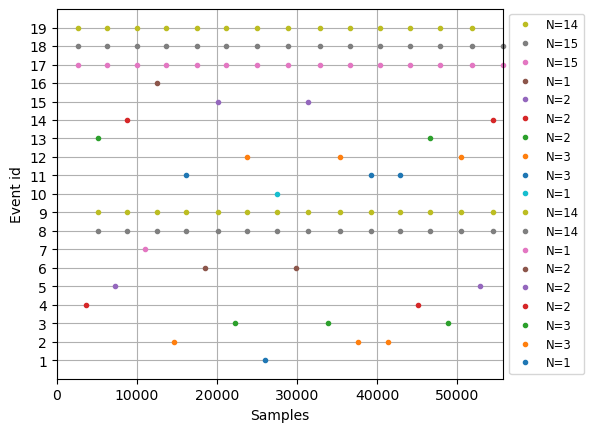

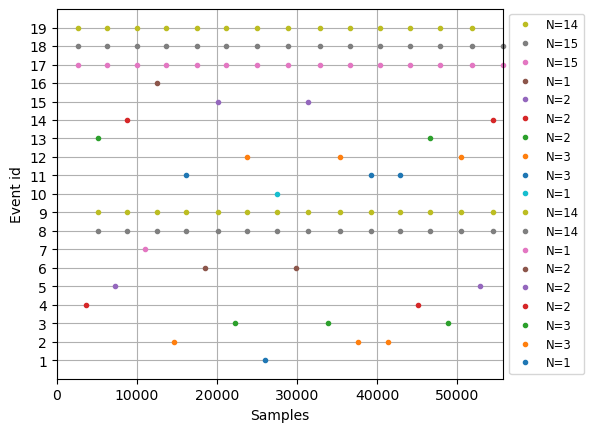

In [309]:
mne.viz.plot_events(events[:100])

In [310]:
epochs.get_data().shape

(126, 33, 359)

In [313]:
df=epochs.to_data_frame()
df

,time,condition,epoch,F3,F1,Fz,F2,F4,FFC5h,FFC3h,...,FCC4h,FCC6h,FTT8h,C5,C3,C1,Cz,C2,C4,C6
0,-0.199219,768,0,2.412866e+06,-3.943446e+06,-5.259605e+06,-8.192259e+06,-8.726058e+06,-4.009182e+06,-3.674653e+06,...,-1.034783e+07,9.633892e+05,4.172834e+06,8.522566e+06,-9.627518e+06,-1.177996e+07,-1.056176e+07,-1.112275e+07,-1.941840e+06,7.306124e+06
1,-0.197266,768,0,-8.066897e+06,-1.385535e+07,-1.339077e+07,-1.581640e+07,-1.502414e+07,-1.329630e+07,-1.215048e+07,...,-1.748476e+07,-4.431108e+06,-1.711153e+06,-1.052654e+07,-1.768980e+07,-2.013504e+07,-1.805411e+07,-1.347175e+07,-6.318808e+06,5.604921e+06
2,-0.195312,768,0,-1.879572e+07,-2.259260e+07,-2.041961e+07,-2.222289e+07,-2.257733e+07,-2.278700e+07,-2.285976e+07,...,-9.589440e+06,8.191670e+05,5.978827e+06,-6.351762e+06,-1.131340e+07,-1.473439e+07,-1.268046e+07,-6.804027e+06,-2.695571e+06,8.337175e+06
3,-0.193359,768,0,-1.343610e+07,-1.418715e+07,-1.279249e+07,-1.318040e+07,-1.494002e+07,-1.571286e+07,-1.486565e+07,...,-4.528802e+06,3.937056e+06,7.697462e+06,7.100981e+06,-4.521225e+06,-7.283940e+06,-6.594511e+06,-3.226451e+06,4.034130e+05,9.022341e+06
4,-0.191406,768,0,-5.583178e+06,-6.454144e+06,-4.477406e+06,-6.583342e+06,-8.334716e+06,-6.693787e+06,-6.481049e+06,...,-1.550591e+07,-6.652826e+06,8.063488e+05,-4.337266e+06,-1.173055e+07,-1.572165e+07,-1.508497e+07,-1.381861e+07,-9.786040e+06,4.637316e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45229,0.492188,33536,291,-8.548177e+06,1.136048e+06,-4.668717e+06,4.041049e+06,5.218666e+06,-1.483318e+07,4.040108e+06,...,1.282510e+07,8.783350e+06,6.108591e+06,1.742256e+07,1.785001e+07,8.999492e+06,1.469116e+07,1.969792e+07,1.288184e+07,1.336932e+07
45230,0.494141,33536,291,-4.058416e+06,5.276376e+06,5.057285e+06,7.032949e+06,6.277521e+06,-1.156923e+07,5.806164e+06,...,1.800658e+07,1.761395e+07,1.710459e+07,2.365518e+07,2.103707e+07,1.228572e+07,1.816656e+07,9.529223e+06,1.682570e+07,2.507431e+07
45231,0.496094,33536,291,4.789204e+06,1.432130e+07,1.067091e+07,1.523266e+07,1.716289e+07,-1.996724e+04,1.409804e+07,...,1.078081e+07,8.459444e+06,9.494196e+06,2.036044e+07,1.798711e+07,1.210905e+07,1.546898e+07,-3.728162e+06,1.122159e+07,1.587363e+07
45232,0.498047,33536,291,7.686042e+06,1.420532e+07,8.202361e+06,1.603761e+07,1.842464e+07,5.796340e+06,1.641115e+07,...,1.606001e+07,1.677130e+07,1.406362e+07,2.969896e+07,2.646665e+07,1.793994e+07,2.150709e+07,2.451573e+07,2.071840e+07,2.394572e+07


# start and continue from here